In [ ]:
import sys
!{sys.executable} -m pip install --upgrade google-api-python-client google-auth-oauthlib google-auth-httplib2 ipyauth

In [ ]:
# Check your client key json file
%cat popstar_client_key.json

In [21]:
# FOR PRETTY JSON DISPLAY ONLY
import json
import uuid
from IPython.display import display_javascript, display_html, display
import requests
import json

def PRETTYJSON(json_data):
    json_data = json_data.json()
    if isinstance(json_data, dict) or isinstance(json_data, list):
        json_str = json.dumps(json_data)
    else:
        json_str = json_data
    str_uuid = str(uuid.uuid4())
    
    return display(json_str, str_uuid)

def display(json_str, str_uuid):
    display_html('<div id="{}" style="height: 600px; width:100%;font: 12px/18px monospace !important;"></div>'.format(str_uuid), raw=True)
    display_javascript("""
    require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        renderjson.set_show_to_level(2);
        document.getElementById('%s').appendChild(renderjson(%s))
    });
    """ % (str_uuid, json_str), raw=True)
    

def youtube_request(access_token, url, method):        
    # Sample url
    # url = f'https://www.googleapis.com/youtube/v3/videos?part={statistics}&id={video_id}'

    if method is 'get':
        headers = {
            'Authorization': f'Bearer {token}',
            'Content-Type': 'application/json'
        }

        r = requests.get(url, headers=headers)

        return r
    else:
        return "Given methods doesnt exist"


'Given methods doesnt exist'

In [ ]:
# LETS TRY TO GENERATE AUTHORIZATION CODE SO WE CAN PROCEED

import os

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import json
from oauth2client import client

scopes = [
    "https://www.googleapis.com/auth/youtube.readonly",
#     "https://www.googleapis.com/auth/youtube.force-ssl",
#     "https://www.googleapis.com/auth/yt-analytics.readonly"
]

api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "popstar_client_key.json"

# Get credentials and create an API client
flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
    client_secrets_file, scopes)
credentials = flow.run_console()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=422694994427-ma9iko90rbs37j63t77otvtl6o4m3qmo.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=xraQMl6cIIPMfVdUHlcyUhqS1eb1IU&prompt=consent&access_type=offline


In [13]:
# EXCHANGE CODE FOR TOKEN AND REFRESH TOKEN
# Redirect_uri must the same as the redirect_uri to the frontend where you requested the Authorization code
# Make sure that you have added 'http://127.0.0.1:3000/' to your Google OAuth client ID credentisl

googleAppId = '422694994427-8vo76kqv7nm99v27dofkek56et6i2tp5.apps.googleusercontent.com'
googleSecret = '0PsnuDv1sPSv9CkpDlsc03Sz'

# You must put valid Authorization code 
auth_code = "4/1AEM5AcWSjPljhXCMWdpZ0jF9QnmfFi7tzIZNlxAoKqGGmnX1e-hAhG_bf4kfWBcgvngEF91TGblNvDZfpQTmso"

url = 'https://www.googleapis.com/oauth2/v4/token'

data = {
    'code': auth_code,
    'client_id': googleAppId,
    'client_secret': googleSecret,
    'redirect_uri': 'http://127.0.0.1:3000/',
    'grant_type':"authorization_code",
};

r = requests.post(url , data=json.dumps(data))

# Display the response
PRETTYJSON(r)


NameError: name 'requests' is not defined

In [14]:
# EXCHANGE REFRESH TOKEN FOR VALID TOKEN

import requests
import json
import googleapiclient.discovery
import googleapiclient.errors

url = 'https://www.googleapis.com/oauth2/v4/token'

data = {
    'client_id': '422694994427-ma9iko90rbs37j63t77otvtl6o4m3qmo.apps.googleusercontent.com',
    'client_secret': 'rbCBAYcaUPpyJNgMUaND9wyV',
    'refresh_token': '1//0gmOXvUeAJNGQCgYIARAAGBASNwF-L9Irlfzh82Jb0OsByWZCHA95oPDir4nSe7UZvT43TvuHVDjwl7ORsCVXq6vGsNizGrpNve0',
    'grant_type': 'refresh_token'
}

r = requests.post(url , data=json.dumps(data))

print(r.json())

r = r.json()

yt_url = 'https://www.googleapis.com/youtube/v3/channels?part=contentDetails,snippet,status,statistics&mine=true'
token = r['access_token']

headers = {
    'Authorization': f'Bearer {token}',
    'Content-Type': 'application/json'
}

r = requests.get(yt_url, headers=headers)

print(url)


{'access_token': 'ya29.a0AfH6SMCchsx_p9j3SdPfSGHFitFwYrZsssGnnhmx-LJjk44mqxQm5iu-OgcDEUPOJaX7gMFKfkbdlgVPyPjPHD-9pRfOB5CePfoknw-NB1vgEApfvJDl7jucUcvDmpp77-yyBRkaj8-VkR_otjFWgYalzFAMiXVXydVQqA', 'expires_in': 3599, 'scope': 'https://www.googleapis.com/auth/youtube.force-ssl https://www.googleapis.com/auth/youtube.readonly https://www.googleapis.com/auth/yt-analytics.readonly', 'token_type': 'Bearer'}
https://www.googleapis.com/oauth2/v4/token


In [12]:
# DIMENSIONS
ageGroup , channel, country, day, gender, month, sharingService, uploaderType, video, 7DayTotals (deprecated, valid until April 15, 2020), 30DayTotals (deprecated, valid until April 15, 2020)

# METRICS
annotationClickThroughRate, annotationCloseRate, averageViewDuration, comments, dislikes, estimatedMinutesWatched, estimatedRevenue, likes, shares, subscribersGained, subscribersLost, viewerPercentage, views


dimension = "month"
startDate = "2020-01-01"
endDate = "2020-06-01"
metrics = "views,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained"

url = f'https://youtubeanalytics.googleapis.com/v2/reports?dimensions={dimension}&endDate={endDate}&ids=channel%3D%3DMINE&metrics={metrics}&startDate={startDate}'

# token = r['access_token']

headers = {
    'Authorization': f'Bearer {token}',
    'Content-Type': 'application/json'
}

r = requests.get(url, headers=headers)

PRETTYJSON(r)




SyntaxError: invalid syntax (<ipython-input-12-830736d53e20>, line 2)

In [11]:
# GETTING SPECIFIC VIDEOS STATISTICS
#   PART PARAMETERS
#     contentDetails: 2
#     fileDetails: 1
#     id: 0
#     liveStreamingDetails: 2
#     localizations: 2
#     player: 0
#     processingDetails: 1
#     recordingDetails: 2
#     snippet: 2
#     statistics: 2
#     status: 2
#     suggestions: 1
#     topicDetails: 2
    
video_id = 'Ks-_Mh1QhMc'
part = 'statistics'
url = f'https://www.googleapis.com/youtube/v3/videos?part={statistics}&id={video_id}'

headers = {
    'Authorization': f'Bearer {token}',
    'Content-Type': 'application/json'
}

r = requests.get(url, headers=headers)

PRETTYJSON(r)

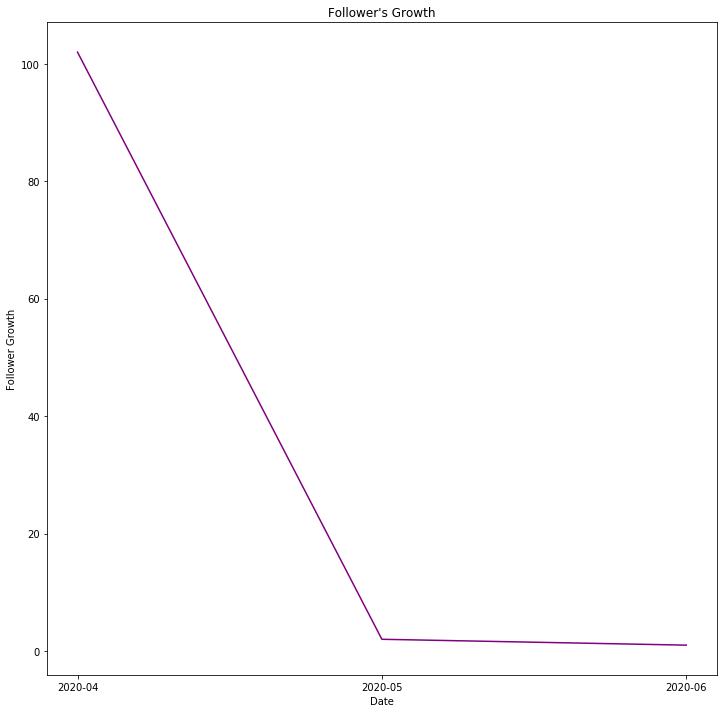

In [11]:
import matplotlib.pyplot as plt

# Sample response from youtube
data = {
  "kind": "youtubeAnalytics#resultTable",
  "columnHeaders": [
    {
      "name": "month",
      "columnType": "DIMENSION",
      "dataType": "STRING"
    },
    {
      "name": "subscribersGained",
      "columnType": "METRIC",
      "dataType": "INTEGER"
    }
  ],
  "rows": [
    [
      "2020-04",
      102
    ],
    [
      "2020-05",
      2
    ],
    [
      "2020-06",
      1
    ]
  ]
}

x = [d[0] for d in data['rows']]
y = [d[1] for d in data['rows']]
# y = range(len(x)) # many thanks to Kyss Tao for setting me straight here
# print(x)


#  Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(x,
        y,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Subscriber Count",
       title="Follower's Growth")

plt.show()
